In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
path = r"D:\Me\TM271\Projects\Heart attack\heartone.csv"

data = pd.read_csv(path)
data.head(5)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
data.shape

(303, 14)

In [ ]:
#Check columns in dataset
data.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

In [ ]:
#Check for null values
data.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [ ]:
#Check data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
data['output'].value_counts()

output
1    165
0    138
Name: count, dtype: int64

In [ ]:
#the description of the data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trtbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalachh,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exng,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [ ]:
injured = data[data['output'].isin([1])]
Noninjured = data[data['output'].isin([0])]

In [ ]:
print('injured')
print(injured.T)
print('-------------------------------------------')
print('Noninjured')
print(Noninjured.T)

injured
            0      1      2      3      4      5      6      7      8    \
age        63.0   37.0   41.0   56.0   57.0   57.0   56.0   44.0   52.0   
sex         1.0    1.0    0.0    1.0    0.0    1.0    0.0    1.0    1.0   
cp          3.0    2.0    1.0    1.0    0.0    0.0    1.0    1.0    2.0   
trtbps    145.0  130.0  130.0  120.0  120.0  140.0  140.0  120.0  172.0   
chol      233.0  250.0  204.0  236.0  354.0  192.0  294.0  263.0  199.0   
fbs         1.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    1.0   
restecg     0.0    1.0    0.0    1.0    1.0    1.0    0.0    1.0    1.0   
thalachh  150.0  187.0  172.0  178.0  163.0  148.0  153.0  173.0  162.0   
exng        0.0    0.0    0.0    0.0    1.0    0.0    0.0    0.0    0.0   
oldpeak     2.3    3.5    1.4    0.8    0.6    0.4    1.3    0.0    0.5   
slp         0.0    0.0    2.0    2.0    2.0    1.0    1.0    2.0    2.0   
caa         0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
thall       1.0  

In [ ]:
data.output.value_counts(dropna=False) #check the no of injured and non injured

output
1    165
0    138
Name: count, dtype: int64

<Axes: ylabel='count'>

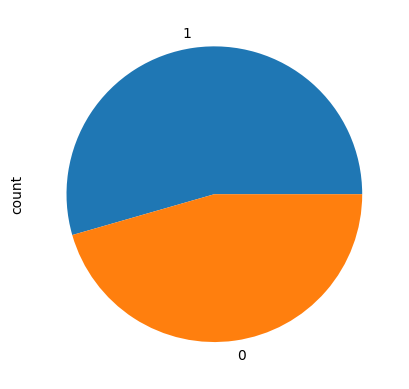

In [ ]:
data.output.value_counts().plot(kind='pie')


C:\Users\momen\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\momen\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\momen\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


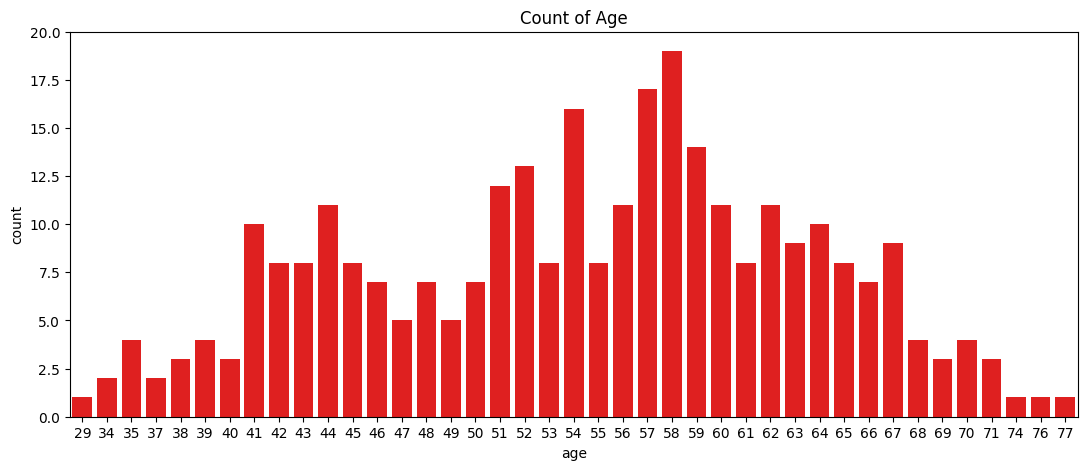

In [ ]:
plt.figure(figsize=(13,5))
sns.countplot(x='age',data = data, color='r');
plt.ylim(0,20)
plt.title("Count of Age");

In [ ]:
heart_attack_data = data[data['output']==1]
heart_attack_data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


C:\Users\momen\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\momen\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\momen\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


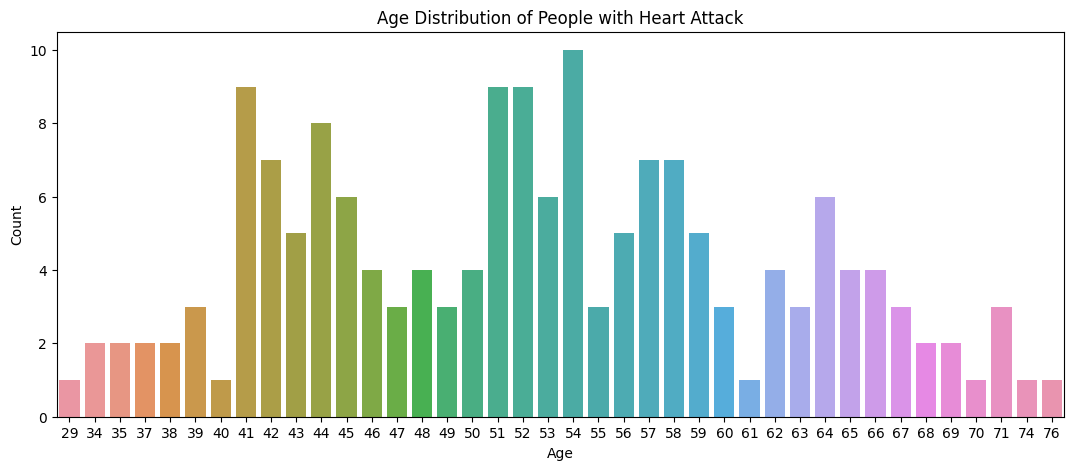

In [ ]:
plt.figure(figsize=(13,5))
sns.countplot(x="age", data=heart_attack_data)
plt.title('Age Distribution of People with Heart Attack')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

C:\Users\momen\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\momen\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\momen\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


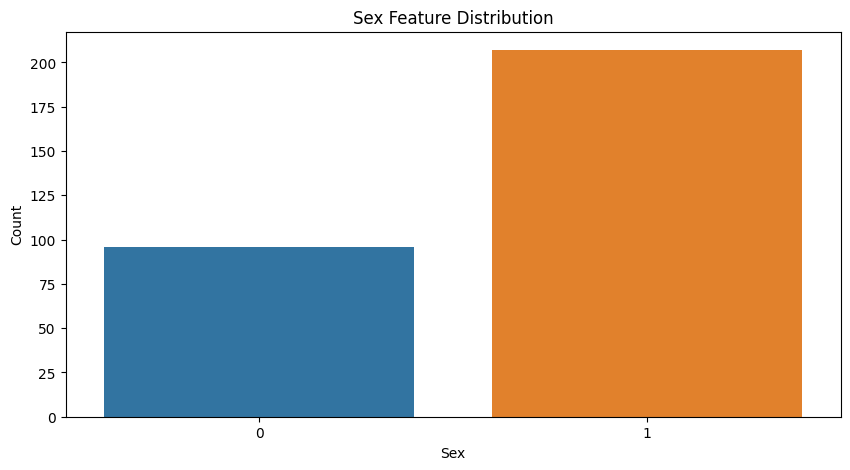

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x="sex", data=data)
plt.title('Sex Feature Distribution')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

In [ ]:
cp_counts = data.cp.value_counts()

In [ ]:
cp_counts.index

Index([0, 2, 1, 3], dtype='int64', name='cp')

In [ ]:
# Define custom colors for each slice
colors = ['aqua', 'gold', 'lightcoral', 'dodgerblue']

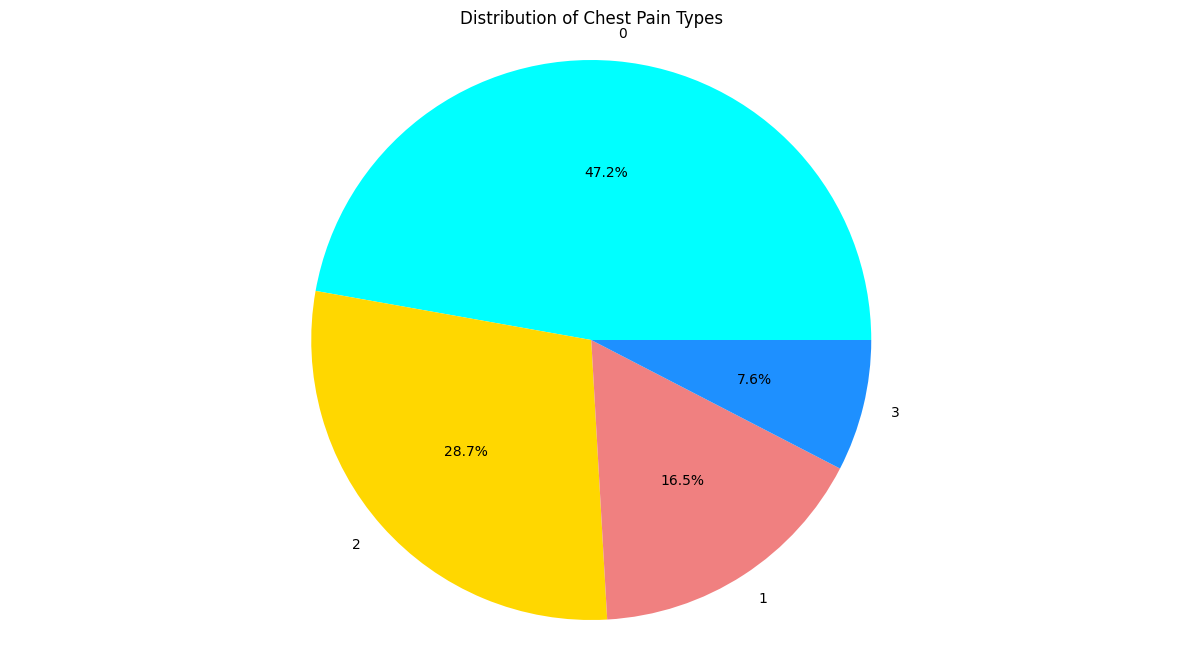

In [ ]:
plt.figure(figsize=(15,8))
plt.pie(cp_counts, labels=cp_counts.index,autopct='%1.1f%%',colors=colors);
plt.title("Distribution of Chest Pain Types");
plt.axis('equal');
plt.show()

In [ ]:
corr=data.corr()
corr

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trtbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalachh,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exng,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


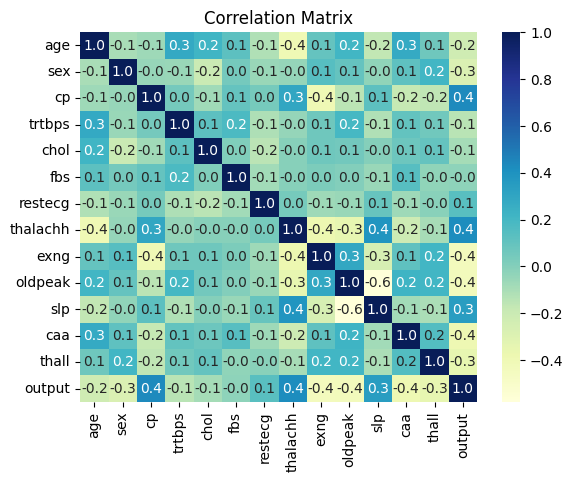

In [ ]:
# Create a heatmap of the correlation matrix with numbers
sns.heatmap(corr, cmap="YlGnBu", annot=True, fmt=".1f")

# Set the title of the plot
plt.title("Correlation Matrix")

# Display the plot
plt.show()

In [ ]:
#take absolute values of correalations
features=data.drop(['output'], axis = 1)
corrs=[abs(corr[attr]['output']) for attr in list(features)]

#make a list of pairs [(corr, features)]
l=list(zip(corrs,list(features)))
#print("Absolute of correlations \n",corrs)
print("List of pairs [(corr,features)]\n",l)

List of pairs [(corr,features)]
 [(0.22543871587483838, 'age'), (0.28093657550176676, 'sex'), (0.43379826150689443, 'cp'), (0.14493112849775, 'trtbps'), (0.08523910513756904, 'chol'), (0.028045760272712952, 'fbs'), (0.1372295028737732, 'restecg'), (0.4217409338106742, 'thalachh'), (0.43675708335330315, 'exng'), (0.4306960016873686, 'oldpeak'), (0.34587707824172464, 'slp'), (0.39172399235125244, 'caa'), (0.34402926803830997, 'thall')]


In [ ]:
# Unzip pairs of two lists
corrs, labels = list(zip(*l))

# `zip(*l)` takes a list that looks like [[a,b,c],[d,e,f],[g,h,i]] and returns [[a,d,g],[b,e,h],[e,f,i]]
# `zip(*l)` unpacks the pairs of two lists into two separate lists, `corrs` and `labels`

# Display the contents of the `corrs` and `labels` lists
print("corrs = \n", corrs, "labels = \n", labels)

corrs = 
 (0.22543871587483838, 0.28093657550176676, 0.43379826150689443, 0.14493112849775, 0.08523910513756904, 0.028045760272712952, 0.1372295028737732, 0.4217409338106742, 0.43675708335330315, 0.4306960016873686, 0.34587707824172464, 0.39172399235125244, 0.34402926803830997) labels = 
 ('age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh', 'exng', 'oldpeak', 'slp', 'caa', 'thall')


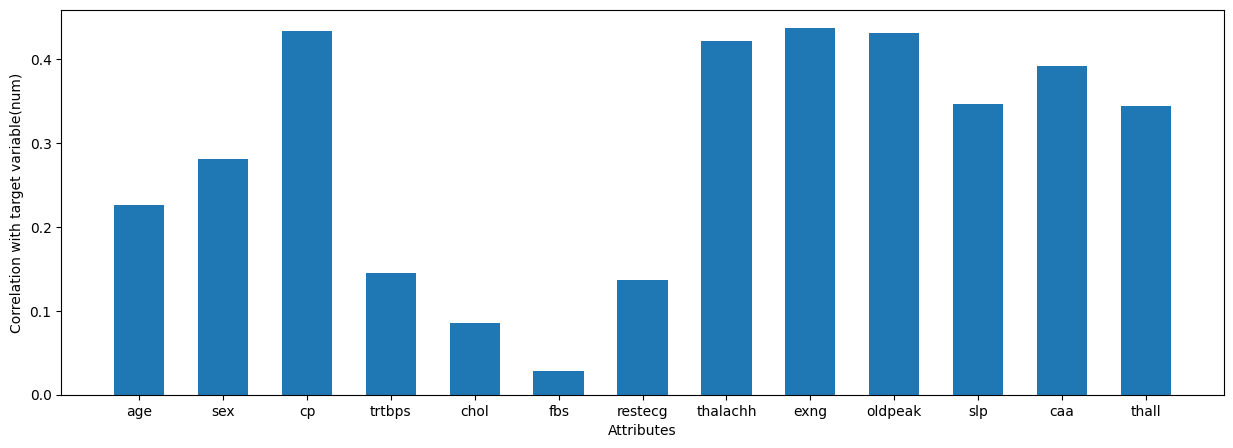

In [ ]:
# Create a numpy array of indices for the x-axis
index = np.arange(len(labels))

# Create a figure with the specified size
fig, ax = plt.subplots(figsize=(15, 5))

# Create a bar plot of the correlations
ax.bar(index, corrs, width=0.6)

# Set the x-label, y-label, and x-tick labels
ax.set_xlabel('Attributes')
ax.set_ylabel('Correlation with target variable(num)')
ax.set_xticks(index)
ax.set_xticklabels(labels)

# Display the plot
plt.show()

In [ ]:
data.drop('fbs', axis=1, inplace=True)


In [ ]:
data.drop('caa',axis=1,inplace=True)


In [ ]:
data.columns


Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'restecg', 'thalachh', 'exng',
       'oldpeak', 'slp', 'thall', 'output'],
      dtype='object')

In [ ]:
X = data.drop('output', axis=1)  # Assuming 'output' is the target column name
y = data['output']

In [ ]:
y


0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: output, Length: 303, dtype: int64

In [ ]:
X


,age,sex,cp,trtbps,chol,restecg,thalachh,exng,oldpeak,slp,thall
0,63,1,3,145,233,0,150,0,2.3,0,1
1,37,1,2,130,250,1,187,0,3.5,0,2
2,41,0,1,130,204,0,172,0,1.4,2,2
3,56,1,1,120,236,1,178,0,0.8,2,2
4,57,0,0,120,354,1,163,1,0.6,2,2
...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,1,123,1,0.2,1,3
299,45,1,3,110,264,1,132,0,1.2,1,3
300,68,1,0,144,193,1,141,0,3.4,1,3
301,57,1,0,130,131,1,115,1,1.2,1,3


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=46, shuffle = True)

# Print the shapes of the resulting subsets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (181, 11)
X_test shape: (122, 11)
y_train shape: (181,)
y_test shape: (122,)


In [ ]:
# Create a logistic regression model
model = LogisticRegression()

# Fit the model to the training data
model.fit(X_train, y_train) # Y true ==> [0,0,0,0,1]

# Make predictions on the testing data
y_pred = model.predict(X_test) # Y predict ==> [0,0,1,0,1]

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.819672131147541


C:\Users\momen\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
